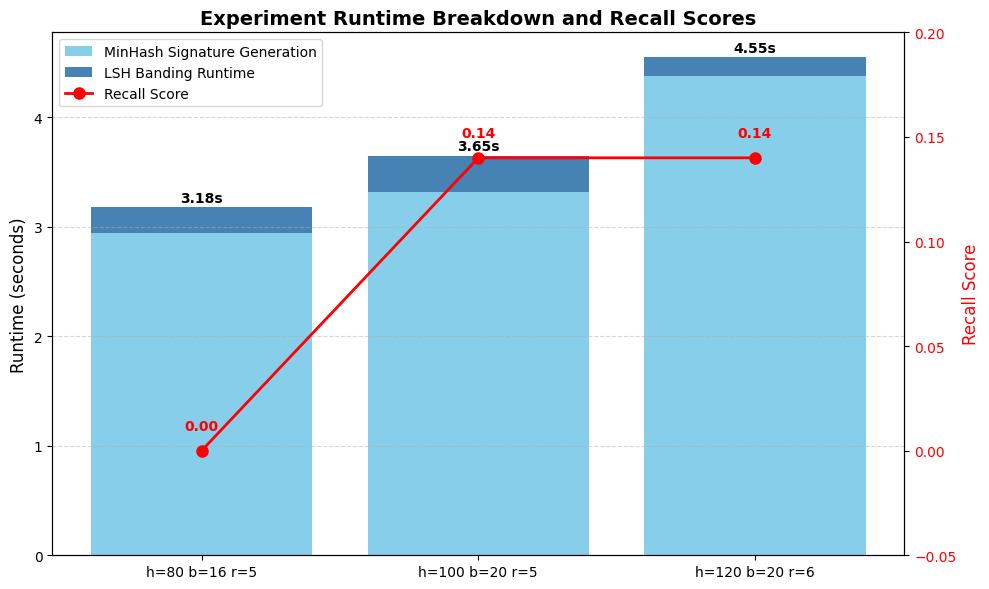

In [3]:
import matplotlib.pyplot as plt
import numpy as np

configs = [
    "h=80 b=16 r=5",
    "h=100 b=20 r=5",
    "h=120 b=20 r=6"
]

signature_time = np.array([2.94, 3.32, 4.38])  
lsh_time       =np.array([0.24, 0.33, 0.17]) 
recall_scores  = np.array([0.00, 0.14, 0.14])  

total = signature_time + lsh_time


fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(configs, signature_time, label="MinHash Signature Generation", color="skyblue")

ax1.bar(configs, lsh_time, bottom=signature_time, label="LSH Banding Runtime", color="steelblue")


ax1.set_ylabel("Runtime (seconds)", fontsize=12)
ax1.set_title("Experiment Runtime Breakdown and Recall Scores", fontsize=14, fontweight="bold")
ax1.grid(axis="y", linestyle="--", alpha=0.5)


for i, t in enumerate(total):
    ax1.text(i, t + 0.05, f"{t:.2f}s", ha="center", fontweight="bold")


ax2 = ax1.twinx()
ax2.plot(configs, recall_scores, color="red", marker="o", linewidth=2, markersize=8, label="Recall Score")
ax2.set_ylabel("Recall Score", fontsize=12, color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.set_ylim(-0.05, 0.20)

for i, r in enumerate(recall_scores):
    ax2.text(i, r + 0.01, f"{r:.2f}", ha="center", fontweight="bold", color="red")


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('jaccard_similarities.csv')


df_sorted = df.sort_values('jaccard_similarity').reset_index(drop=True)


plt.figure(figsize=(10, 10))

x_values = np.arange(len(df_sorted))

plt.scatter(x_values, df_sorted['jaccard_similarity'], alpha=0.6, s=20, color='steelblue', edgecolors='none')

plt.xlabel('User Pair Index (Sorted by Similarity)', fontsize=12)
plt.ylabel('Jaccard Similarity', fontsize=12)
plt.title('Jaccard Similarity Distribution (646 pairs)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.3)

mean_sim = df_sorted['jaccard_similarity'].mean()
plt.axhline(mean_sim, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_sim:.4f}')
plt.legend()

plt.tight_layout()
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'jaccard_similarities.csv'

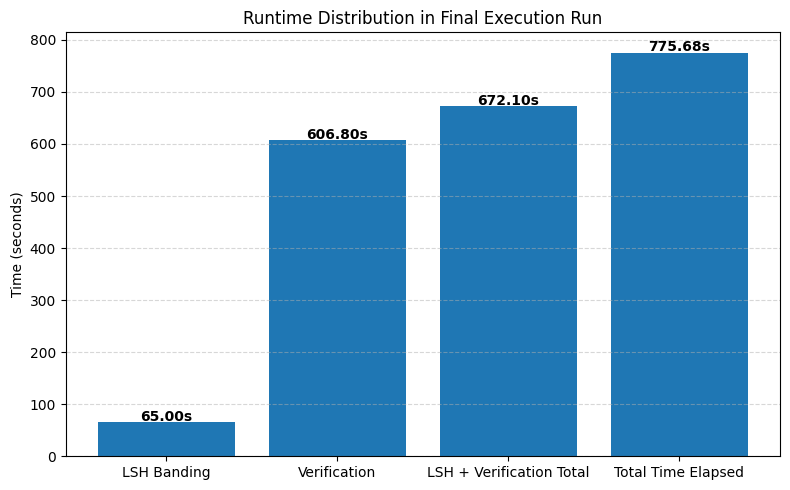

In [5]:
import matplotlib.pyplot as plt

lsh_banding = 65.0
verification = 606.8
total_processing= 672.1 
total_elapsed = 775.68

labels = ["LSH Banding", "Verification","LSH + Verification Total", "Total Time Elapsed"]
times =  [lsh_banding,verification,total_processing,total_elapsed]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, times)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2,f"{height:.2f}s", ha='center', fontweight='bold')

plt.ylabel("Time (seconds)")
plt.title("Runtime Distribution in Final Execution Run")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()